In [1]:
#name: Counterfeit Wine
#type: classification
#aim: to identify counterfeit wine on the basis of given compositions and characteristics

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("wine_fraud.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
#EDA and Visualization

In [6]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

<AxesSubplot:xlabel='quality', ylabel='count'>

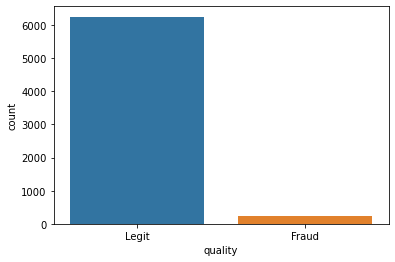

In [7]:
sns.countplot(data=df, x='quality')

<AxesSubplot:xlabel='type', ylabel='count'>

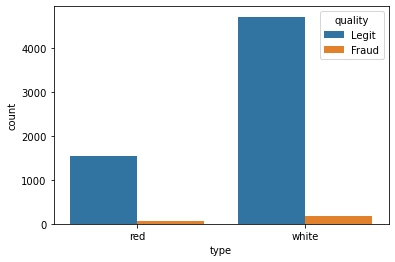

In [8]:
sns.countplot(data=df,x='type',hue='quality')

In [9]:
print("Fraud Red Wine Percentage:")
100*len(df[(df['type']=='red') & (df['quality']=='Fraud')])/len(df[df['type']=='red'])

Fraud Red Wine Percentage:


3.9399624765478425

In [10]:
print("Fraud White Wine Percentage:")
100*len(df[(df['type']=='white') & (df['quality']=='Fraud')])/len(df[df['type']=='white'])

Fraud White Wine Percentage:


3.736218864842793

In [11]:
df['Fraud']=df['quality'].map({'Legit':0,'Fraud':1})

In [12]:
df_corr=df.corr()['Fraud'].sort_values()[:-1]
df_corr

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
Name: Fraud, dtype: float64

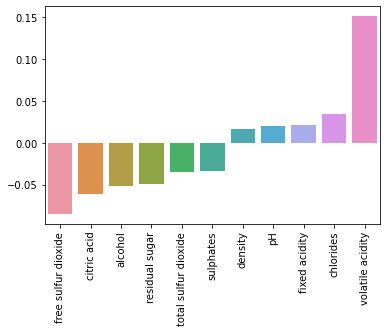

In [13]:
sns.barplot(x=df_corr.index,y=df_corr.values);
plt.xticks(rotation=90);

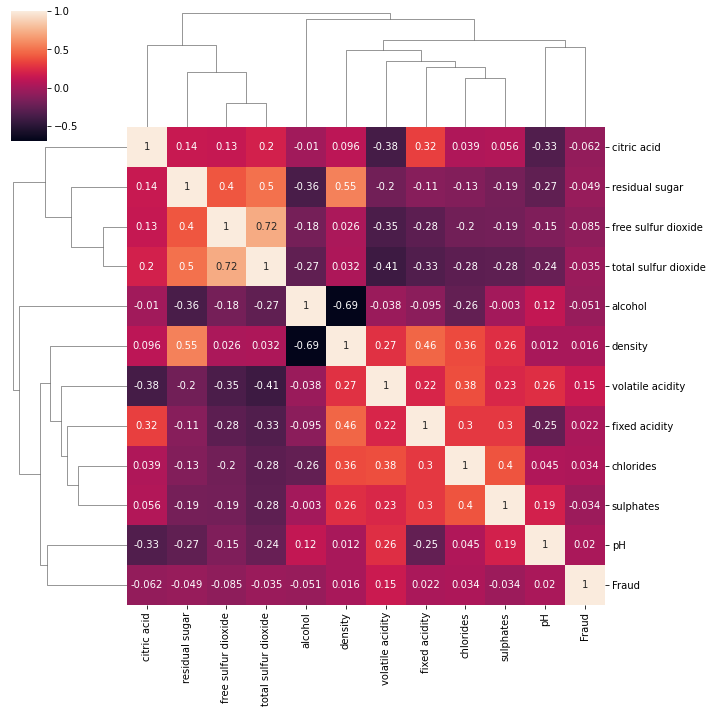

In [14]:
sns.clustermap(df.corr(), annot=True);

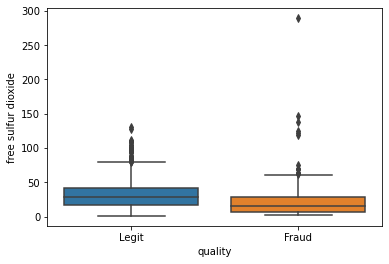

In [15]:
sns.boxplot(data=df,x='quality',y='free sulfur dioxide');

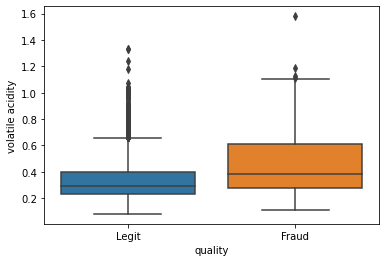

In [16]:
sns.boxplot(data=df,x='quality',y='volatile acidity');

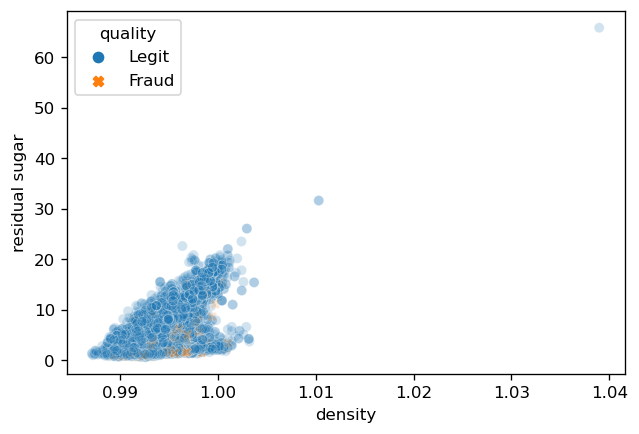

In [17]:
plt.figure(dpi=120)
sns.scatterplot(data=df, x='density',y='residual sugar',hue='quality', style='quality', alpha=0.2);

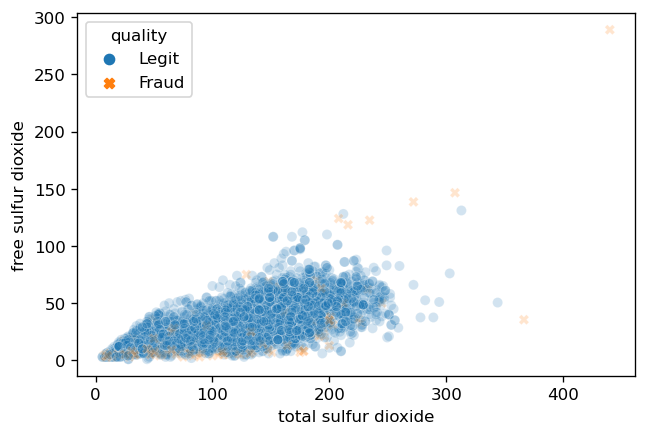

In [18]:
plt.figure(dpi=120)
sns.scatterplot(data=df, x='total sulfur dioxide',y='free sulfur dioxide',hue='quality', style='quality', alpha=0.2);

In [19]:
#train-test split and scaling

In [20]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)
df = df.drop('Fraud',axis=1)

X=df.drop('quality',axis=1)
y=df['quality']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)

In [22]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
#testing various machine learning models

In [24]:
#logistic regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [26]:
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred=lr.predict(X_test)

In [28]:
from sklearn.metrics import *

In [29]:
accuracy_score(y_test,y_pred)

0.963076923076923

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       1.00      0.05      0.10        38
       Legit       0.96      1.00      0.98       937

    accuracy                           0.96       975
   macro avg       0.98      0.53      0.54       975
weighted avg       0.96      0.96      0.95       975



In [31]:
# (low recall and f1 score)

In [32]:
confusion_matrix(y_test,y_pred)

array([[  2,  36],
       [  0, 937]], dtype=int64)

In [33]:
#KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred=knn.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred)

0.96

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.40      0.05      0.09        38
       Legit       0.96      1.00      0.98       937

    accuracy                           0.96       975
   macro avg       0.68      0.52      0.54       975
weighted avg       0.94      0.96      0.94       975



In [39]:
# (low precision, recall and f1 score)

In [40]:
confusion_matrix(y_test,y_pred)

array([[  2,  36],
       [  3, 934]], dtype=int64)

In [41]:
#SVM

In [42]:
from sklearn.svm import SVC
svc=SVC()

In [43]:
svc.fit(X_train,y_train)

SVC()

In [44]:
y_pred=svc.predict(X_test)

In [45]:
accuracy_score(y_test,y_pred)

0.961025641025641

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.00      0.00      0.00        38
       Legit       0.96      1.00      0.98       937

    accuracy                           0.96       975
   macro avg       0.48      0.50      0.49       975
weighted avg       0.92      0.96      0.94       975



C:\Users\yuvra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yuvra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yuvra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [49]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
y_pred=dt.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.9405128205128205

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.25      0.26      0.26        38
       Legit       0.97      0.97      0.97       937

    accuracy                           0.94       975
   macro avg       0.61      0.62      0.61       975
weighted avg       0.94      0.94      0.94       975



In [53]:
confusion_matrix(y_test,y_pred)

array([[ 10,  28],
       [ 30, 907]], dtype=int64)

In [54]:
#Random Forests

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [56]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
y_pred=rf.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred)

0.963076923076923

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.75      0.08      0.14        38
       Legit       0.96      1.00      0.98       937

    accuracy                           0.96       975
   macro avg       0.86      0.54      0.56       975
weighted avg       0.96      0.96      0.95       975



In [60]:
#AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()

In [62]:
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [63]:
y_pred=ab.predict(X_test)

In [64]:
accuracy_score(y_test,y_pred)

0.963076923076923

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.75      0.08      0.14        38
       Legit       0.96      1.00      0.98       937

    accuracy                           0.96       975
   macro avg       0.86      0.54      0.56       975
weighted avg       0.96      0.96      0.95       975



In [66]:
#Hyperparameter tuning for best algorithm (Decision Tree)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid= {'criterion':['gini','entropy'], 'max_depth':[5,10,20],'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,5], 'min_impurity_decrease':[0.0,0.01,0.05,0.1] }

In [69]:
dt_grid_model=GridSearchCV(dt,param_grid,cv=5,scoring='balanced_accuracy')

In [70]:
import warnings
warnings.filterwarnings('ignore')
dt_grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='balanced_accuracy')

In [71]:
dt_grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

In [72]:
feat_imp=pd.DataFrame(index=X.columns,columns=['Importance'])
feat_imp['Importance']=dt_grid_model.best_estimator_.feature_importances_
feat_imp['Importance'].sort_values(ascending=False)

total sulfur dioxide    0.146327
free sulfur dioxide     0.118206
volatile acidity        0.115739
residual sugar          0.091241
density                 0.090719
chlorides               0.074132
alcohol                 0.072833
pH                      0.070175
fixed acidity           0.064952
sulphates               0.056056
type                    0.053135
citric acid             0.046485
Name: Importance, dtype: float64

In [73]:
# Performance Evaluation

In [74]:
y_pred=dt_grid_model.predict(X_test)

In [75]:
accuracy_score(y_test,y_pred)

0.9476923076923077

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.29      0.24      0.26        38
       Legit       0.97      0.98      0.97       937

    accuracy                           0.95       975
   macro avg       0.63      0.61      0.62       975
weighted avg       0.94      0.95      0.95       975



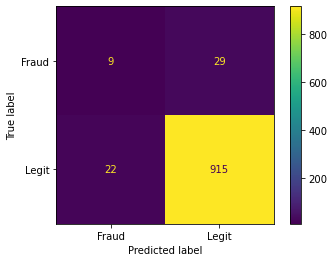

In [77]:
plot_confusion_matrix(dt_grid_model,X_test,y_test)

In [78]:
# (Even the most suitable model doesn't perform well on this dataset)

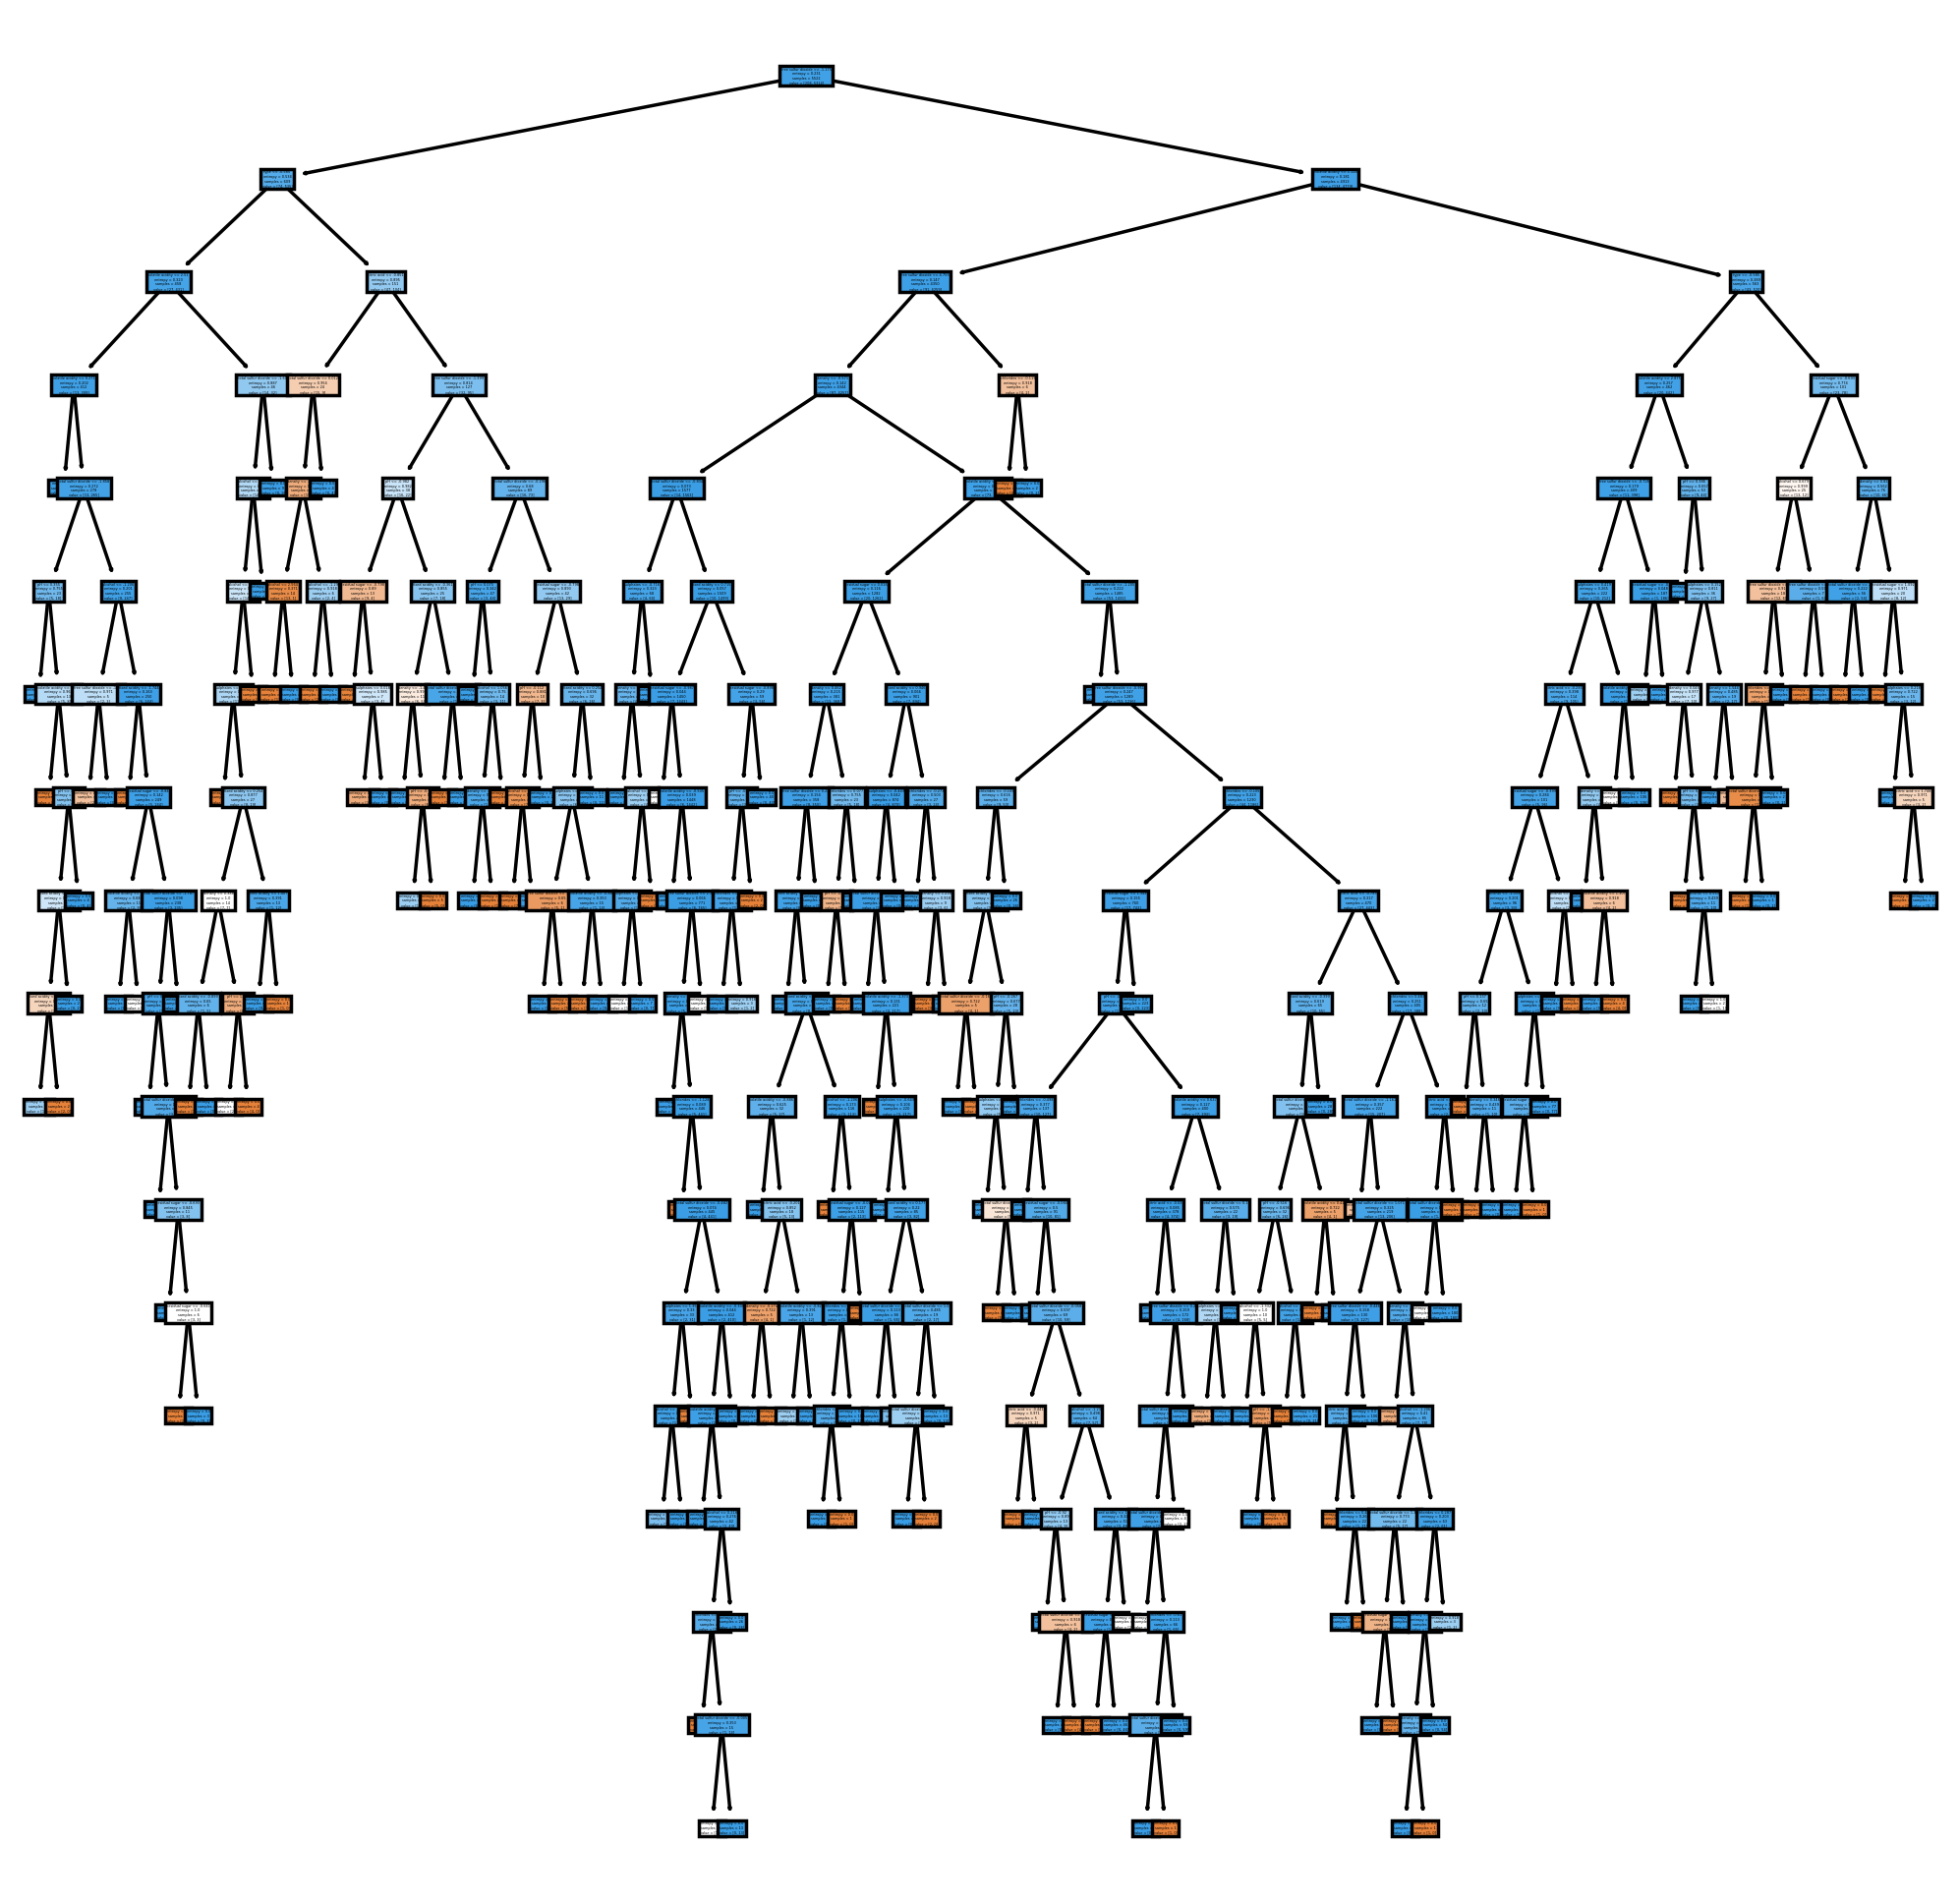

In [79]:
from sklearn.tree import plot_tree
plt.figure(dpi=250,figsize=(10,10))
plot_tree(dt_grid_model.best_estimator_, feature_names=X.columns, filled=True);

In [80]:
# final model

In [81]:
final_dt_model=DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)
X_scaled=scaler.fit_transform(X)
final_dt_model.fit(X_scaled,y)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

In [82]:
import joblib

In [83]:
joblib.dump(final_dt_model,'Counterfeit Wine Model.pkl')
joblib.dump(list(X.columns),'Counterfeit Wine Columns.pkl')

['Counterfeit Wine Columns.pkl']